<a href="https://colab.research.google.com/github/hideaki-kyutech/softcomp2023/blob/main/gym_control2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt update && apt install xvfb # xvfb(X11の仮想ディスプレイ)
!pip install gym-notebook-wrapper # ColabでGymの描画機能を利用するライブラリ

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,678 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,333 kB]
Get:13 https://ppa.launchpadcontent.net/c2d4u.team/c2

In [17]:
import gnwrapper
import gym # OpenAI-gym
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- `observation[0]`: Cart Position
- `observation[1]`: Cart Velocity
- `observation[2]`: Pole Angle
- `observation[3]`: Pole Angular Velocity

- `reward`: 棒が立っている状態をキープしているとき 1

- 終了条件(`done=1`となる条件)
 1. Pole Angle が$\pm 12$&deg;以上となった時
 2. Cart Positionが$\pm 2.4$以上となった時
 3. 継続ステップ数が500以上になった時

- `env.action_space.sample()`: 0または1をランダムに出力（0=カートを左に移動、1=カートを右に移動）

In [26]:
env = gnwrapper.LoopAnimation(gym.make('CartPole-v1')) # Xvfbが起動される
# https://gymnasium.farama.org/environments/classic_control/

observation = env.reset() # 環境の初期化
sum_reward = 0
max_reward = 0

pos_hist = []
vpos_hist = []
ang_hist = []
vang_hist =[]
force_hist = []

for i in range(500):
    force = env.action_space.sample()
    observation, reward, done, info = env.step(force) # random action
    sum_reward += reward
    pos_hist.append(observation[0])
    vpos_hist.append(observation[1])
    ang_hist.append(observation[2])
    vang_hist.append(observation[3])
    env.render() # ここで、描画データを保存する
    if done:
        observation = env.reset()
        print(f"The stick fell down at {i+1}th step.")
        print(f"The total reward is {sum_reward}")
        if max_reward < sum_reward:
          max_reward = sum_reward
        sum_reward = 0

env.display() # ここで、保存した描画データをアニメーションとして表示する
print(f"The max reward is {max_reward}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

The stick fell down at 11th step.
The total reward is 11.0
The stick fell down at 25th step.
The total reward is 14.0
The stick fell down at 46th step.
The total reward is 21.0
The stick fell down at 56th step.
The total reward is 10.0
The stick fell down at 68th step.
The total reward is 12.0
The stick fell down at 82th step.
The total reward is 14.0
The stick fell down at 108th step.
The total reward is 26.0
The stick fell down at 119th step.
The total reward is 11.0
The stick fell down at 134th step.
The total reward is 15.0
The stick fell down at 149th step.
The total reward is 15.0
The stick fell down at 177th step.
The total reward is 28.0
The stick fell down at 187th step.
The total reward is 10.0
The stick fell down at 201th step.
The total reward is 14.0
The stick fell down at 212th step.
The total reward is 11.0
The stick fell down at 228th step.
The total reward is 16.0
The stick fell down at 242th step.
The total reward is 14.0
The stick fell down at 255th step.
The total r

The max reward is 40.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


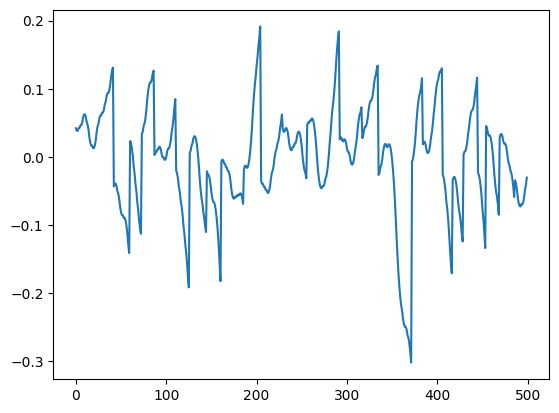

In [24]:
plt.plot(np.array(pos_hist))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


28.69374932717983


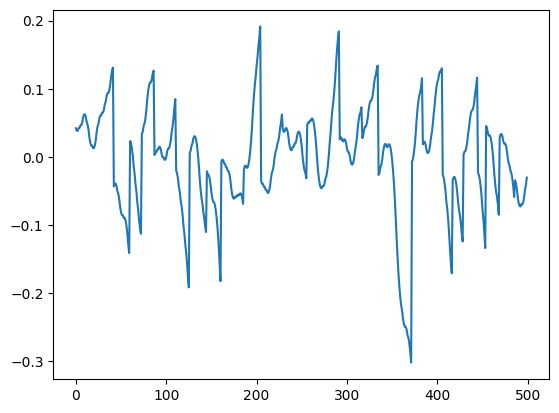

In [20]:
plt.plot(np.array(pos_hist))
print(sum(abs(np.array(pos_hist))))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


200.92924689123174


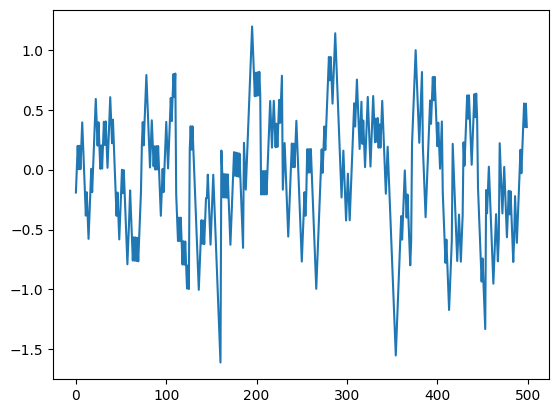

In [21]:
plt.plot(np.array(vpos_hist))
print(sum(abs(np.array(vpos_hist))))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


42.47018425825809


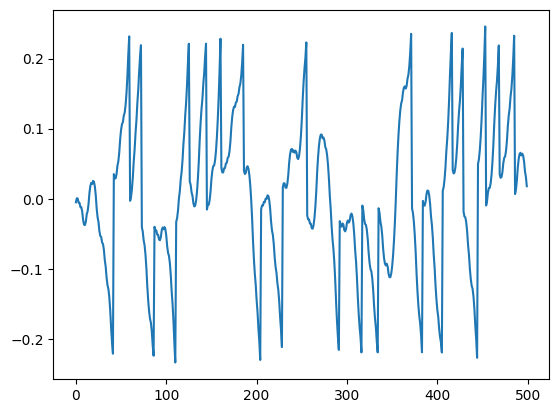

In [22]:
plt.plot(np.array(ang_hist))
print(sum(abs(np.array(ang_hist))))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


200.92924689123174


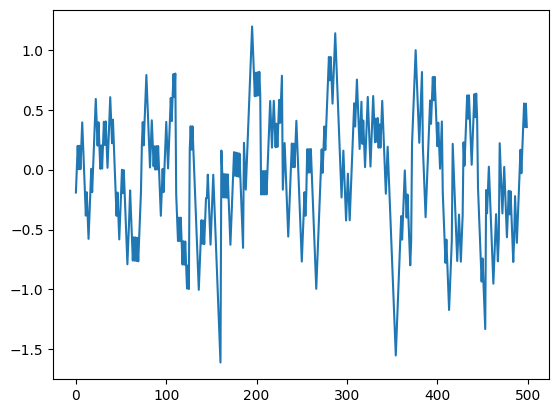

In [23]:
plt.plot(np.array(vpos_hist))
print(sum(abs(np.array(vpos_hist))))